In [20]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FFMpegWriter
import matplotlib.animation as animation

In [10]:
metadata = dict(title='Final Project', artist='Matplotlib',comment='Evtol')
writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=200000)
fig = plt.figure(dpi=200)

<Figure size 1200x800 with 0 Axes>

In [11]:
n = 21 #number of data points, floors + 1

### Displacement = 0.5, k = 50

In [12]:
%%time
# Initial conditions
x1 = np.full(n,4.5)
x2 = np.full(n,5.5)
y = np.arange(n)

xnew1 = np.zeros(n)
xnew1[0] = 5
xnew1[n-1] = 4.5

xnew2 = np.zeros(n)
xnew2[0] = 6
xnew2[n-1] = 5.5

# Variables 
k = 50
t = 10**-2
delta_y = y[1] - y[0]

fig = plt.figure()

it = 0
def animate(i):
    global x1, xnew1, x2, xnew2, y, k, t, delta_y, it

    if it%100 == 0:
        if it == 0:
            xnew1[0] = 5
            xnew2[0] = 6
#         elif it%200 == 100: #100,300,500,...
#             xnew1[0] = 4
#             xnew2[0] = 6
#         elif it%400 == 0: #400,800
#             xnew1[0] = 5
#             xnew2[0] = 7
#         elif it%400 == 200: #200,600,1000
#             xnew1[0] = 3
#             xnew2[0] = 5
        elif it%200 == 100: #1,3,5,...
            xnew1[0] = 4.5
            xnew2[0] = 5.5
        elif it%200 == 0: #2,4,6,...
            xnew1[0] = 5
            xnew2[0] = 6

    for i in np.arange(1,n):
        if i == n-1: #i == 20
            xnew1[i] = 0.2 * (x1[i] + 2*x1[i-1] + 2*x1[i-2])
            xnew2[i] = 0.2 * (x2[i] + 2*x2[i-1] + 2*x2[i-2])
        else:
#             original:
#             xnew1[i] = k*t/delta_y**2*(x1[i+1] - 2*x1[i] + x1[i-1]) + x1[i]
#             xnew2[i] = k*t/delta_y**2*(x2[i+1] - 2*x2[i] + x2[i-1]) + x2[i]
#             modified:
            xnew1[i] = k*t/delta_y**2*(1*x1[i+1] - 2.25*x1[i] + 1.25*x1[i-1]) + x1[i]
            xnew2[i] = k*t/delta_y**2*(1*x2[i+1] - 2.25*x2[i] + 1.25*x2[i-1]) + x2[i]
    x1 = xnew1
    x2 = xnew2
    
    fig.clear()
    ax = fig.add_subplot(111)
    tx = ax.set_title('Iteration 0')
    ax.set_xlim([0,10])
    ax.plot(x1,y,'bo-',mfc='black')
    ax.plot(x2,y,'bo-',mfc='black')
    ax.plot([x1[n-1],x2[n-1]],[20,20],'bo-',mfc='black')
    tx.set_text('Iteration: {0}'.format(it))
    it = it + 1
    plt.pause(0.01)

ani = animation.FuncAnimation(fig, animate, frames=1000)
FFwriter = animation.FFMpegWriter()
ani.save('eq1.mp4', writer=FFwriter)

NameError: name 'animation' is not defined

<Figure size 432x288 with 0 Axes>

### Displacement = 1, k = 50

In [13]:
%%time
# Initial conditions
x1 = np.full(n,4.5)
x2 = np.full(n,5.5)
y = np.arange(n)

xnew1 = np.zeros(n)
xnew1[0] = 5.5
xnew1[n-1] = 4.5

xnew2 = np.zeros(n)
xnew2[0] = 6.5
xnew2[n-1] = 5.5

# Variables
k = 50
t = 10**-2
delta_y = y[1] - y[0]

fig = plt.figure()

it = 0
def animate(i):
    global x1, xnew1, x2, xnew2, y, k, t, delta_y, it

    if it%100 == 0:
        if it == 0:
            xnew1[0] = 5.5
            xnew2[0] = 6.5
        elif it%200 == 100: #1,3,5,...
            xnew1[0] = 4.5
            xnew2[0] = 5.5
        elif it%200 == 0: #2,4,6,...
            xnew1[0] = 5.5
            xnew2[0] = 6.5

    for i in np.arange(1,n):
        if i == n-1: #i == 20
            xnew1[i] = 0.2 * (x1[i] + 2*x1[i-1] + 2*x1[i-2])
            xnew2[i] = 0.2 * (x2[i] + 2*x2[i-1] + 2*x2[i-2])
        else:
            xnew1[i] = k*t/delta_y**2*(1*x1[i+1] - 2.25*x1[i] + 1.25*x1[i-1]) + x1[i]
            xnew2[i] = k*t/delta_y**2*(1*x2[i+1] - 2.25*x2[i] + 1.25*x2[i-1]) + x2[i]
    x1 = xnew1
    x2 = xnew2
    
    fig.clear()
    ax = fig.add_subplot(111)
    tx = ax.set_title('Iteration 0')
    ax.set_xlim([0,10])
    ax.plot(x1,y,'bo-',mfc='black')
    ax.plot(x2,y,'bo-',mfc='black')
    ax.plot([x1[n-1],x2[n-1]],[20,20],'bo-',mfc='black')
    tx.set_text('Iteration: {0}'.format(it))
    it = it + 1
    plt.pause(0.01)

ani = animation.FuncAnimation(fig, animate, frames=1000)
FFwriter = animation.FFMpegWriter()
ani.save('eq2.mp4', writer=FFwriter)

NameError: name 'animation' is not defined

<Figure size 432x288 with 0 Axes>

### Displacement = 0.5, k = 25

In [14]:
%%time
# Initial conditions
x1 = np.full(n,4.5)
x2 = np.full(n,5.5)
y = np.arange(n)

xnew1 = np.zeros(n)
xnew1[0] = 5
xnew1[n-1] = 4.5

xnew2 = np.zeros(n)
xnew2[0] = 6
xnew2[n-1] = 5.5

# Variables 
k = 25 #equivalent to higher stiffness
t = 10**-2
delta_y = y[1] - y[0]

fig = plt.figure()

it = 0
def animate(i):
    global x1, xnew1, x2, xnew2, y, k, t, delta_y, it

    if it%100 == 0:
        if it == 0:
            xnew1[0] = 5
            xnew2[0] = 6
        elif it%200 == 100: #1,3,5,...
            xnew1[0] = 4.5
            xnew2[0] = 5.5
        elif it%200 == 0: #2,4,6,...
            xnew1[0] = 5
            xnew2[0] = 6

    for i in np.arange(1,n):
        if i == n-1: #i == 20
            xnew1[i] = 0.2 * (x1[i] + 2*x1[i-1] + 2*x1[i-2])
            xnew2[i] = 0.2 * (x2[i] + 2*x2[i-1] + 2*x2[i-2])
        else:
            xnew1[i] = k*t/delta_y**2*(1*x1[i+1] - 2.25*x1[i] + 1.25*x1[i-1]) + x1[i]
            xnew2[i] = k*t/delta_y**2*(1*x2[i+1] - 2.25*x2[i] + 1.25*x2[i-1]) + x2[i]
    x1 = xnew1
    x2 = xnew2
    
    fig.clear()
    ax = fig.add_subplot(111)
    tx = ax.set_title('Iteration 0')
    ax.set_xlim([0,10])
    ax.plot(x1,y,'bo-',mfc='black')
    ax.plot(x2,y,'bo-',mfc='black')
    ax.plot([x1[n-1],x2[n-1]],[20,20],'bo-',mfc='black')
    tx.set_text('Iteration: {0}'.format(it))
    it = it + 1
    plt.pause(0.01)

ani = animation.FuncAnimation(fig, animate, frames=1000)
FFwriter = animation.FFMpegWriter()
ani.save('eq3.mp4', writer=FFwriter)

NameError: name 'animation' is not defined

<Figure size 432x288 with 0 Axes>

### Wind Load: Displacement = 0.5, 0.25; no initial EQ

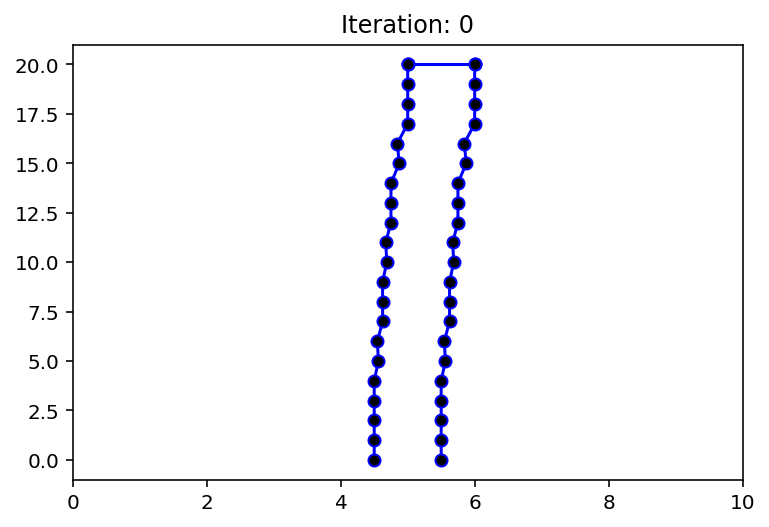

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '5', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'eq_w1.mp4']' returned non-zero exit status 255.

In [31]:
%%time
# Initial conditions
x1 = np.full(n,4.5)
x1[n-5:n] = 5
x1[n-10:n-5] = 4.75
x1[n-15:n-10] = 4.625

x2 = np.full(n,5.5)
x2[n-5:n] = 6
x2[n-10:n-5] = 5.75
x2[n-15:n-10] = 5.625
y = np.arange(n)

xnew1 = np.zeros(n)
xnew1[0] = 4.5
xnew1[n-5:n] = 5
xnew1[n-10:n-5] = 4.75
xnew1[n-15:n-10] = 4.625

xnew2 = np.zeros(n)
xnew2[0] = 5.5
xnew2[n-5:n] = 6
xnew2[n-10:n-5] = 5.75
xnew2[n-15:n-10] = 5.625

# Variables 
k = 50
t = 10**-2
delta_y = y[1] - y[0]

fig = plt.figure()

it = 0
def animate(i):
    global x1, xnew1, x2, xnew2, y, k, t, delta_y, it

    if it%100 == 0:
        if it%200 == 100: #1,3,5,...
            xnew1[0] = 4.5
            xnew2[0] = 5.5
        elif it%200 == 0 and it != 0: #2,4,6,...
            xnew1[0] = 5
            xnew2[0] = 6

    for i in np.arange(1,n):
        if i == n-1: #i == 20
            xnew1[i] = 0.2 * (x1[i] + 2*x1[i-1] + 2*x1[i-2])
            xnew2[i] = 0.2 * (x2[i] + 2*x2[i-1] + 2*x2[i-2])
        else:
            xnew1[i] = k*t/delta_y**2*(1*x1[i+1] - 2.25*x1[i] + 1.25*x1[i-1]) + x1[i]
            xnew2[i] = k*t/delta_y**2*(1*x2[i+1] - 2.25*x2[i] + 1.25*x2[i-1]) + x2[i]
    x1 = xnew1
    x2 = xnew2
    
    fig.clear()
    ax = fig.add_subplot(111)
    tx = ax.set_title('Iteration 0')
    ax.set_xlim([0,10])
    ax.plot(x1,y,'bo-',mfc='black')
    ax.plot(x2,y,'bo-',mfc='black')
    ax.plot([x1[n-1],x2[n-1]],[20,20],'bo-',mfc='black')
    tx.set_text('Iteration: {0}'.format(it))
    it = it + 1
    plt.pause(0.01)

ani = animation.FuncAnimation(fig, animate, frames=1000)
FFwriter = animation.FFMpegWriter()
ani.save('eq_w1.mp4', writer=FFwriter)

### EQ and Wind in Same Direction (animation1)

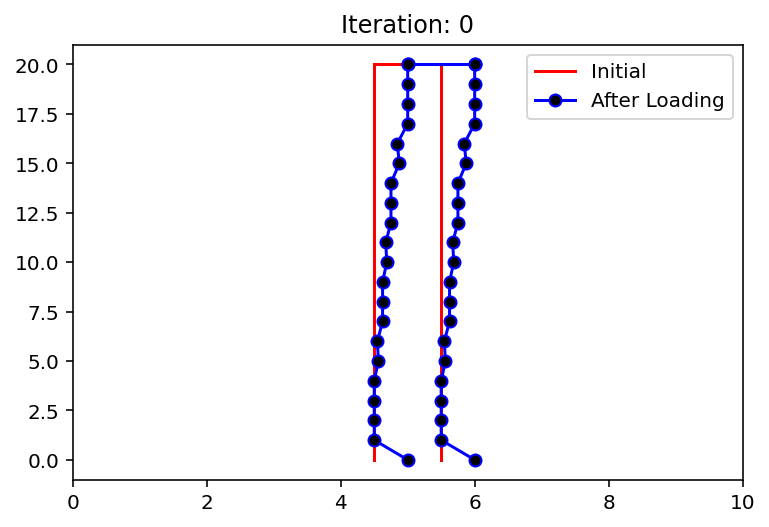

CPU times: user 1min 42s, sys: 9.12 s, total: 1min 51s
Wall time: 2min 3s


In [34]:
%%time
# Initial conditions
x1 = np.full(n,4.5)
initialx1 = np.copy(x1)
x1[n-5:n] = 5
x1[n-10:n-5] = 4.75
x1[n-15:n-10] = 4.625

x2 = np.full(n,5.5)
initialx2 = np.copy(x2)
x2[n-5:n] = 6
x2[n-10:n-5] = 5.75
x2[n-15:n-10] = 5.625
y = np.arange(n)

xnew1 = np.zeros(n)
xnew1[0] = 4.5
xnew1[n-5:n] = 5
xnew1[n-10:n-5] = 4.75
xnew1[n-15:n-10] = 4.625

xnew2 = np.zeros(n)
xnew2[0] = 5.5
xnew2[n-5:n] = 6
xnew2[n-10:n-5] = 5.75
xnew2[n-15:n-10] = 5.625

# Variables 
k = 50
t = 10**-2
delta_y = y[1] - y[0]

fig = plt.figure()

it = 0
def animate(i):
    global x1, xnew1, x2, xnew2, y, k, t, delta_y, it

    if it%100 == 0:
        if it == 0:
            xnew1[0] = 5
            xnew2[0] = 6
        elif it%200 == 100: #1,3,5,...
            xnew1[0] = 4.5
            xnew2[0] = 5.5
        elif it%200 == 0: #2,4,6,...
            xnew1[0] = 5
            xnew2[0] = 6

    for i in np.arange(1,n):
        if i == n-1: #i == 20
            xnew1[i] = 0.2 * (x1[i] + 2*x1[i-1] + 2*x1[i-2])
            xnew2[i] = 0.2 * (x2[i] + 2*x2[i-1] + 2*x2[i-2])
        else:
            xnew1[i] = k*t/delta_y**2*(1*x1[i+1] - 2.25*x1[i] + 1.25*x1[i-1]) + x1[i]
            xnew2[i] = k*t/delta_y**2*(1*x2[i+1] - 2.25*x2[i] + 1.25*x2[i-1]) + x2[i]
    x1 = xnew1
    x2 = xnew2
    
    fig.clear()
    ax = fig.add_subplot(111)
    tx = ax.set_title('Iteration 0')
    ax.set_xlim([0,10])
    
    # Red Outline
    ax.plot(initialx1,y,'r-',label='Initial')
    ax.plot(initialx2,y,'r-')
    ax.plot([initialx1[n-1],initialx2[n-1]],[20,20],'r-')
    
    ax.plot(x1,y,'bo-',mfc='black',label='After Loading')
    ax.plot(x2,y,'bo-',mfc='black')
    ax.plot([x1[n-1],x2[n-1]],[20,20],'bo-',mfc='black')
    ax.legend()
    tx.set_text('Iteration: {0}'.format(it))
    it = it + 1
    plt.pause(0.01)

ani = animation.FuncAnimation(fig, animate, frames=1000)
FFwriter = animation.FFMpegWriter()
ani.save('eq_w2.mp4', writer=FFwriter)

### EQ and Wind in Opposite Directions (animation2)

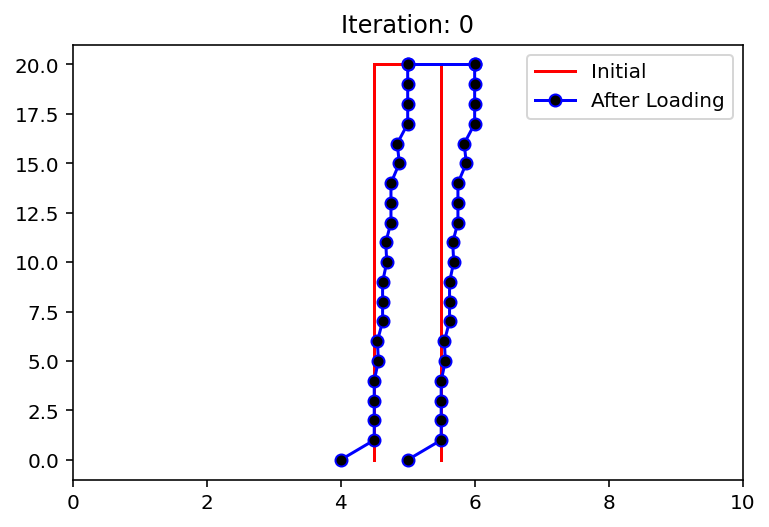

CPU times: user 1min 43s, sys: 9.31 s, total: 1min 52s
Wall time: 2min 4s


In [36]:
%%time
# Initial conditions
x1 = np.full(n,4.5)
initialx1 = np.copy(x1)
x1[n-5:n] = 5
x1[n-10:n-5] = 4.75
x1[n-15:n-10] = 4.625

x2 = np.full(n,5.5)
initialx2 = np.copy(x2)
x2[n-5:n] = 6
x2[n-10:n-5] = 5.75
x2[n-15:n-10] = 5.625
y = np.arange(n)

xnew1 = np.zeros(n)
xnew1[0] = 4.5
xnew1[n-5:n] = 5
xnew1[n-10:n-5] = 4.75
xnew1[n-15:n-10] = 4.625

xnew2 = np.zeros(n)
xnew2[0] = 5.5
xnew2[n-5:n] = 6
xnew2[n-10:n-5] = 5.75
xnew2[n-15:n-10] = 5.625

# Variables 
k = 50
t = 10**-2
delta_y = y[1] - y[0]

fig = plt.figure()

it = 0
def animate(i):
    global x1, xnew1, x2, xnew2, y, k, t, delta_y, it

    if it%100 == 0:
        if it == 0:
            xnew1[0] = 4
            xnew2[0] = 5
        elif it%200 == 100: #1,3,5,...
            xnew1[0] = 4.5
            xnew2[0] = 5.5
        elif it%200 == 0: #2,4,6,...
            xnew1[0] = 4
            xnew2[0] = 5

    for i in np.arange(1,n):
        if i == n-1: #i == 20
            xnew1[i] = 0.2 * (x1[i] + 2*x1[i-1] + 2*x1[i-2])
            xnew2[i] = 0.2 * (x2[i] + 2*x2[i-1] + 2*x2[i-2])
        else:
            xnew1[i] = k*t/delta_y**2*(1*x1[i+1] - 2.25*x1[i] + 1.25*x1[i-1]) + x1[i]
            xnew2[i] = k*t/delta_y**2*(1*x2[i+1] - 2.25*x2[i] + 1.25*x2[i-1]) + x2[i]
    x1 = xnew1
    x2 = xnew2
    
    fig.clear()
    ax = fig.add_subplot(111)
    tx = ax.set_title('Iteration 0')
    ax.set_xlim([0,10])
    
    # Red Outline
    ax.plot(initialx1,y,'r-',label='Initial')
    ax.plot(initialx2,y,'r-')
    ax.plot([initialx1[n-1],initialx2[n-1]],[20,20],'r-')
    
    ax.plot(x1,y,'bo-',mfc='black',label='After Loading')
    ax.plot(x2,y,'bo-',mfc='black')
    ax.plot([x1[n-1],x2[n-1]],[20,20],'bo-',mfc='black')
    ax.legend()
    tx.set_text('Iteration: {0}'.format(it))
    it = it + 1
    plt.pause(0.01)

ani = animation.FuncAnimation(fig, animate, frames=1000)
FFwriter = animation.FFMpegWriter()
ani.save('eq_w3.mp4', writer=FFwriter)